In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
DATA_PATH = "../data/"
train_data = pd.read_json(f"{DATA_PATH}polygons.jsonl", lines=True)
test_data = pd.read_json(f"{DATA_PATH}polygons.jsonl", lines=True)

In [2]:
df_flattened = train_data.explode('annotations')
temp_df = df_flattened['annotations'].apply(pd.Series)
poly_df = pd.concat([train_data['id'], temp_df], axis=1)
poly_df.reset_index(inplace=True, drop=True)
poly_df.head(20)

,id,type,coordinates
0,0006ff2aa7cd,glomerulus,"[[[167, 249], [166, 249], [165, 249], [164, 24..."
1,0006ff2aa7cd,blood_vessel,"[[[283, 109], [282, 109], [281, 109], [280, 10..."
2,0006ff2aa7cd,blood_vessel,"[[[104, 292], [103, 292], [102, 292], [101, 29..."
3,0006ff2aa7cd,blood_vessel,"[[[505, 442], [504, 442], [503, 442], [502, 44..."
4,0006ff2aa7cd,blood_vessel,"[[[375, 477], [374, 477], [373, 477], [372, 47..."
5,0006ff2aa7cd,blood_vessel,"[[[368, 410], [367, 410], [366, 410], [365, 41..."
6,0006ff2aa7cd,blood_vessel,"[[[339, 249], [338, 249], [337, 249], [336, 24..."
7,0006ff2aa7cd,blood_vessel,"[[[352, 67], [351, 67], [350, 67], [349, 67], ..."
8,0006ff2aa7cd,blood_vessel,"[[[227, 299], [226, 299], [225, 299], [224, 29..."
9,00168d1b7522,glomerulus,"[[[511, 216], [511, 216], [510, 216], [509, 21..."


In [3]:
coordinates_array = poly_df.loc[1, 'coordinates']
print(coordinates_array)

[[[283, 109], [282, 109], [281, 109], [280, 109], [279, 109], [279, 108], [278, 108], [277, 108], [277, 107], [276, 107], [276, 106], [276, 105], [275, 105], [275, 104], [275, 103], [275, 102], [274, 102], [274, 101], [274, 100], [274, 99], [273, 99], [273, 98], [273, 97], [273, 96], [273, 95], [273, 94], [272, 94], [272, 93], [272, 92], [272, 91], [272, 90], [272, 89], [272, 88], [272, 87], [272, 86], [272, 85], [273, 84], [273, 84], [273, 83], [274, 82], [274, 82], [274, 81], [275, 80], [275, 80], [275, 79], [276, 78], [276, 78], [276, 77], [277, 76], [277, 76], [277, 75], [278, 74], [279, 74], [279, 74], [280, 73], [281, 73], [282, 73], [282, 74], [283, 74], [284, 74], [284, 75], [284, 76], [285, 76], [286, 76], [286, 77], [286, 78], [287, 78], [287, 79], [287, 80], [288, 80], [288, 81], [288, 82], [289, 82], [290, 82], [290, 83], [290, 84], [291, 84], [291, 85], [291, 86], [291, 87], [291, 88], [291, 89], [291, 90], [291, 91], [291, 92], [291, 93], [291, 94], [291, 95], [291, 96], 

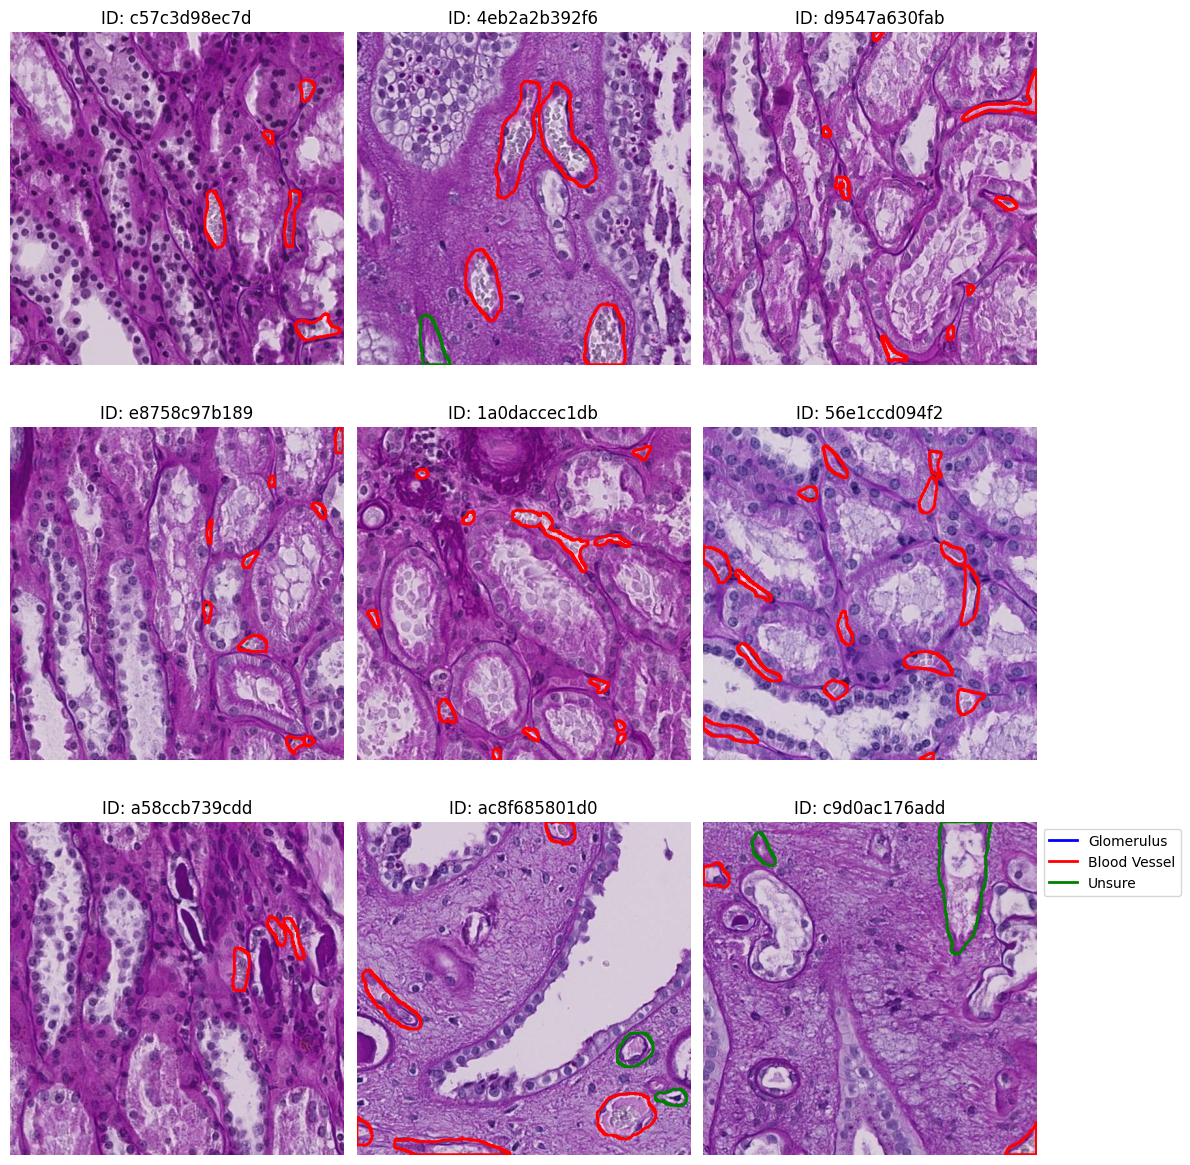

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image

def plot_image_with_masks(df):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()

    unique_ids = df['id'].unique()
    if len(unique_ids) < 9:
        sampled_ids = np.random.choice(unique_ids, size=9, replace=True)
    else:
        sampled_ids = np.random.choice(unique_ids, size=9, replace=False)

    for i, image_id in enumerate(sampled_ids):
        image_path = f"{DATA_PATH}/train/{image_id}.tif"
        image = np.array(Image.open(image_path))

        # Plot the image
        axes[i].imshow(image)
        axes[i].axis('off')

        # Get the masks for the current image ID
        masks = df[df['id'] == image_id]

        # Plot the polygon masks
        for _, row in masks.iterrows():
            mask_type = row['type']
            coordinates = row['coordinates']
            color = get_mask_color(mask_type)
            for coord in coordinates:
                polygon = Polygon(coord, closed=True, edgecolor=color, linewidth=2, fill=False)
                axes[i].add_patch(polygon)

        # Set the title as the image ID
        axes[i].set_title(f"ID: {image_id}")

    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color='blue', linewidth=2, label='Glomerulus'),
        plt.Line2D([0], [0], color='red', linewidth=2, label='Blood Vessel'),
        plt.Line2D([0], [0], color='green', linewidth=2, label='Unsure')
    ]
    axes[-1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

def get_mask_color(mask_type):
    if mask_type == 'glomerulus':
        return 'blue'
    elif mask_type == 'blood_vessel':
        return 'red'
    elif mask_type == 'unsure':
        return 'green'
    else:
        return 'black'  # Default color if mask type is unknown

# Call the function with your dataframe
plot_image_with_masks(poly_df)

In [5]:
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torch.nn as nn
import torch.nn.functional as F
import torch

# Mask R-CNN Model

In [49]:
class MaskRCNN(nn.Module):
    def __init__(self, num_classes):
        super(MaskRCNN, self).__init__()
        
        self.model = maskrcnn_resnet50_fpn(pretrained=True)
        
        in_features = self.model.roi_heads.box_predictor.cls_score.in_features
        self.model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
        
        in_features_mask = self.model.roi_heads.mask_predictor.conv5_mask.in_channels
        self.model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)
        
    def forward(self, images, targets=None):
        return self.model(images, targets)
    
    def train_model(self, train_loader, optimizer, num_epochs):
        #self.model.to(device)
        self.model.train()
        for epoch in range(num_epochs):
            total_loss = 0
            for images, masks in train_loader:
                #images = images.to(device)
                #masks = masks.to(device)
                #labels = labels.to(device)

                # Forward pass
                targets = []
                for mask in masks:
                    boxes = self.get_bounding_boxes(mask)
                    if len(boxes) == 0:
                        continue
                    target = {
                        'masks': mask,
                        'boxes': boxes,
                    }
                    targets.append(target)

                if len(targets) == 0:
                    continue

                outputs = self.model(images, targets)
                loss = self.model.get_loss(outputs, masks)

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

            average_loss = total_loss / len(train_loader)
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss}")

        print("Training complete.")

    def get_loss(self, outputs, masks, loss_type='bce'):
        if loss_type == 'bce':
            loss = self.binary_cross_entropy_loss(outputs, masks)
        elif loss_type == 'dice':
            loss = self.dice_loss(outputs, masks)
        else:
            raise ValueError("Invalid loss type. Supported loss types are 'bce' and 'dice'.")
        
        return loss
    
    def binary_cross_entropy_loss(self, outputs, masks, labels):
        mask_logits = outputs['masks']
        mask_targets = masks.float()
        loss = F.binary_cross_entropy_with_logits(mask_logits, mask_targets)
        
        return loss
    
    def dice_loss(self, outputs, masks, labels):
        mask_logits = outputs['masks']
        mask_targets = masks.float()
        mask_probs = torch.sigmoid(mask_logits)
        
        smooth = 1e-5
        intersection = (mask_probs * mask_targets).sum(dim=(2, 3))
        union = mask_probs.sum(dim=(2, 3)) + mask_targets.sum(dim=(2, 3))
        dice_scores = (2.0 * intersection + smooth) / (union + smooth)
        loss = 1 - dice_scores.mean()
        
        return loss
    
    def get_bounding_boxes(self, mask):
        num_instances = mask.shape[0]
        boxes = []
        
        for i in range(num_instances):
            m = mask[i]
            # Find the indices where the mask is non-zero
            indices = np.argwhere(m)
            if len(indices) > 0:
                # Compute the bounding box coordinates
                x1 = np.min(indices[:, 1])
                y1 = np.min(indices[:, 0])
                x2 = np.max(indices[:, 1])
                y2 = np.max(indices[:, 0])
                boxes.append([x1, y1, x2, y2])
        
        return boxes

# Custom predictor for the classification layer
class FastRCNNPredictor(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FastRCNNPredictor, self).__init__()
        
        self.fc = nn.Linear(in_channels, num_classes)
        
    def forward(self, x):
        x = self.fc(x)
        return x

# Custom predictor for the mask layer
class MaskRCNNPredictor(nn.Sequential):
    def __init__(self, in_channels, hidden_dim, num_classes):
        super(MaskRCNNPredictor, self).__init__(
            nn.ConvTranspose2d(in_channels, hidden_dim, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(hidden_dim, num_classes, kernel_size=1, stride=1)
        )

In [50]:
import sys
sys.path.append('../dataset')
from Datasets import BaseDataset
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms
#transform
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Resizing to smaller dimensions for quicker training
    transforms.ToTensor()  # Convert image to PyTorch tensor
])

dataset = BaseDataset('../data/', transform=transform)

train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [51]:
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
dataset = BaseDataset('../data/', transform=transform)
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

hello


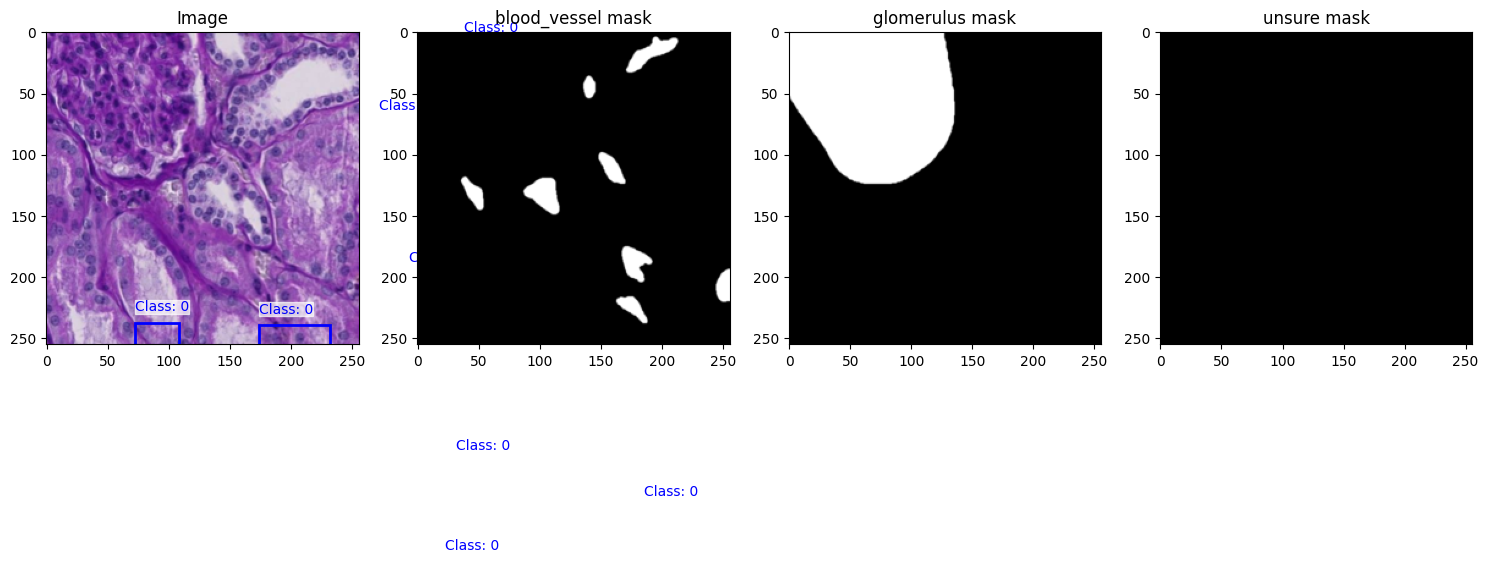

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys
sys.path.append('../dataset')
from Datasets import BaseDataset
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset = BaseDataset('../data/', transform=transform)
index = 0  # Choose an index
dataset.plot_example(index)

In [1]:
num_classes = 3  # Assuming you have 3 classes: blood_vessel, glomerulus, and unsure
model = MaskRCNN(num_classes)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()  # Use appropriate loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

NameError: name 'MaskRCNN' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Store loss and accuracy values during training
train_losses = []
validation_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, targets in train_loader:  # Change from 'images, masks, targets' to 'images, targets'
        optimizer.zero_grad()
        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss / len(train_loader)}")

    # Calculate and store validation accuracy
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, masks, targets in test_loader:
            outputs = model(images)
            # Implement your own accuracy calculation based on model outputs and targets
            # Update total_correct and total_samples here

    validation_accuracy = total_correct / total_samples
    validation_accuracies.append(validation_accuracy)

    # Store training loss
    train_losses.append(running_loss / len(train_loader))


# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append('../dataset')
from Datasets import BaseDataset
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms


class MaskRCNN(nn.Module):
    def __init__(self, num_classes):
        super(MaskRCNN, self).__init__()
        
        self.model = maskrcnn_resnet50_fpn(pretrained=True)
        
        in_features = self.model.roi_heads.box_predictor.cls_score.in_features
        self.model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
        
        in_features_mask = self.model.roi_heads.mask_predictor.conv5_mask.in_channels
        self.model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)

    def forward(self, images, targets=None):
        return self.model(images, targets)
    

    # Custom predictor for the classification layer
class FastRCNNPredictor(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FastRCNNPredictor, self).__init__()
        
        self.fc = nn.Linear(in_channels, num_classes)
        
    def forward(self, x):
        x = self.fc(x)
        return x

# Custom predictor for the mask layer
class MaskRCNNPredictor(nn.Sequential):
    def __init__(self, in_channels, hidden_dim, num_classes):
        super(MaskRCNNPredictor, self).__init__(
            nn.ConvTranspose2d(in_channels, hidden_dim, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(hidden_dim, num_classes, kernel_size=1, stride=1)
        )
    
        

In [4]:
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
dataset = BaseDataset('../data/', transform=transform)
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.is_available()
num_classes = 4  # Including background
learning_rate = 0.001
num_epochs = 10
model = MaskRCNN(num_classes=num_classes)
model = model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

/home/berni/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/berni/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for images, masks in train_loader:
        optimizer.zero_grad()

        # Move data to GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = 0
        for output, mask in zip(outputs, masks):
            loss += criterion(output, mask)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss}")

# Save the trained model
torch.save(model.state_dict(), 'path_to_save_model.pth')

In [11]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.mask_rcnn import MaskRCNN
import sys
import os

# Add the project root directory to the system path
project_root = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(project_root)
from dataset.Datasets import BaseDataset
# Make sure to replace 'your_base_dataset_module' with the correct import path

# Set a seed for reproducibility
torch.manual_seed(42)

# Data transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load and split the dataset
dataset = BaseDataset('../data/', transform=transform)
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Define the number of classes (including background)
num_classes = 4

# Load a pretrained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features=1024, out_features=num_classes)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features=1024, out_features=num_classes * 4)
model.roi_heads.mask_predictor.conv5_mask = torch.nn.ConvTranspose2d(
    in_channels=256, out_channels=num_classes, kernel_size=2, stride=2
)

# Move the model to the chosen device
model = model.to(device)

# Define optimizer and loss function
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

Using device: cuda


/home/berni/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/berni/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
import matplotlib.pyplot as plt

# Training loop
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    
    for images, targets in train_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        
        loss.backward()
        optimizer.step()

        train_loss += loss_value
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    test_loss = 0.0
    
    with torch.no_grad():
        for images, targets in test_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            loss_value = losses.item()
            
            test_loss += loss_value
            
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

TypeError: Compose.__call__() takes 2 positional arguments but 3 were given